In [5]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

/Users/santiago/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/santiago/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


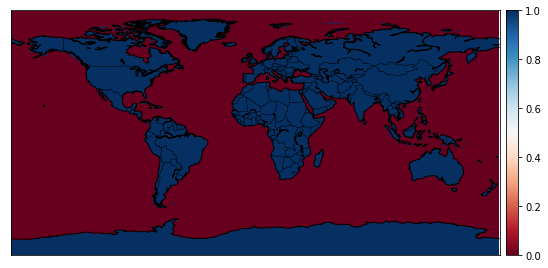

In [7]:
land_ocean_mask = '/Users/santiago/Desktop/Recientes/MSc_Internship/KNMI_folders/Fluor_retrieval/Input/land_ocean_mask2_hd.asc'
seamask = np.flipud(np.genfromtxt(land_ocean_mask, skip_header=6))
xx, yy  = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
map     = Basemap(projection='cyl', lat_0=0, lon_0=0)
fig     = plt.figure(1,figsize=(20,20))

ax      = fig.add_subplot(121)
imm     = map.pcolormesh(xx,yy,seamask,cmap='RdBu') # GnBU,Jet,coolwarm
cb      = add_colorbar(imm)
map.drawcoastlines()
map.drawcountries()
plt.show()

In [9]:
path         = '/Users/santiago/Desktop/Recientes/MSc_Internship/KNMI_folders/botiabo2/data_download/Joiner/Level3/'
prefixA      = 'ret_f_nr5_nsvd12_v26_waves734_nolog.grid_SIF_v27_'
prefixB      = 'ret_f_nr5_nsvd12_v26_waves734_nolog.MOB.grid_SIF_MOB.v27_'
sufix        = '_31.nc'
start_date   = '2013-01-01'
end_date     = '2016-12-01'
daterange    = pd.date_range(start_date, end_date, freq='M')

gome2a       = np.ma.array(np.zeros((45,360,720),float))
gome2b       = np.ma.array(np.zeros((45,360,720),float))

cont = 0
for single_date in daterange:
    
    year  = str(single_date.year)
    month = str(single_date.month).zfill(2)
    day   = '01'
    fnameA = path + prefixA + year + month + day + sufix
    fnameB = path + prefixB + year + month + day + sufix
    try:
        dataA = cdf.Dataset(fnameA)
        dataB = cdf.Dataset(fnameB)
    except:
        print (year, month)
        continue
    
    A       = np.array(dataA.variables['SIF'])
    B       = np.array(dataB.variables['SIF'])
    
    maskedA = np.ma.masked_values(A,-999.0)
    maskedB = np.ma.masked_values(B,-999.0)
    
    gome2a[cont] = maskedA
    gome2b[cont] = maskedB #* seamask
            
    cont+=1
    
print (cont)

2013 01
2013 02
45


/Users/santiago/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/santiago/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


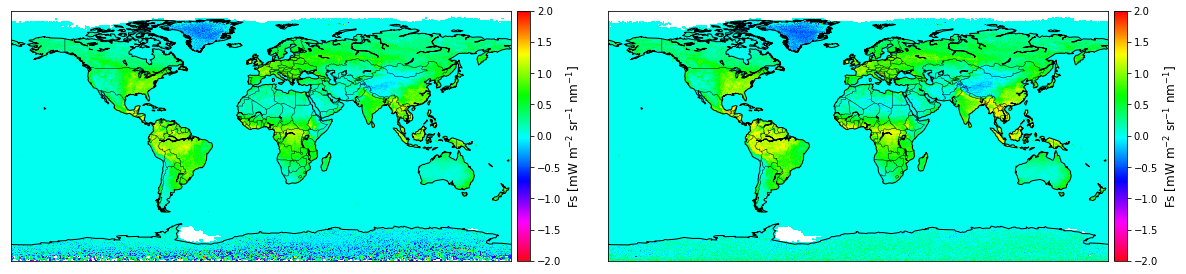

1.83170306683 2.60171508789 -2.20132613182 -2.52402973175 -0.0166031146461


In [11]:
ga         = np.mean(gome2a)
gb         = np.mean(gome2b)
gome2a_avg = np.mean(gome2a,axis=0)
gome2b_avg = np.mean(gome2b,axis=0)

xx, yy  = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
map     = Basemap(projection='cyl', lat_0=0, lon_0=0)

fig     = plt.figure(1,figsize=(20,20))

ax      = fig.add_subplot(121)
imm     = map.pcolormesh(xx,yy,gome2a_avg[::-1,:]*seamask,cmap='hsv_r') # GnBU,Jet,coolwarm
cb      = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
#ax.set_title('(Global  mean = %0.4f [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$])'%(ga),fontsize=12)
cb.set_label('Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()
#map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
#map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)


ax           = fig.add_subplot(122)
imm          = map.pcolormesh(xx,yy,gome2b_avg[::-1,:]*seamask,cmap='hsv_r') # GnBU,Jet,coolwarm
cb           = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
#ax.set_title('GOME2b (Global mean = %0.4f [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$])'%(gb),fontsize=12)
cb.set_label('Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()

plt.subplots_adjust(wspace=0.15)
#fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/GOME2_a_b_2_joiner.png',bbox_inches='tight',DPI=1000)
plt.show()
print (np.max(gome2a_avg*seamask), np.max(gome2b_avg),np.min(gome2a_avg),np.min(gome2b_avg),ga-gb)
#print np.median(gome2a_avg), np.median(gome2b_avg)

In [12]:
ga-gb #-0.016603114646119091

-0.016603114646119091

/usr/lib64/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib64/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib64/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


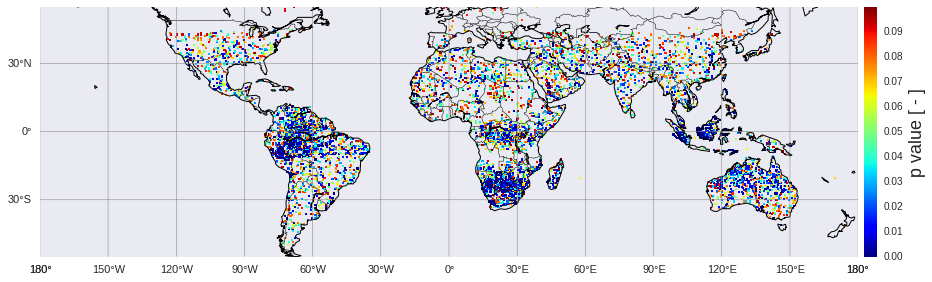

In [10]:
a,b = stats.ttest_ind(gome2a,gome2b)

bb  = np.ma.masked_invalid(b*seamask)
bbb = np.ma.masked_where(bb==0,bb)
bbbb= np.ma.masked_where(bb>0.1,bbb)


lllat    = -55
urlat    = 55
lllon    = -180
uprlon   = 180

#map    = Basemap(projection='cyl', lat_0=0, lon_0=0)
map    = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
fig    = plt.figure(1,figsize=(15,15))
ax     = fig.add_subplot(111)
xx, yy = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
imm    = map.pcolormesh(xx,yy,bbbb,cmap='jet') # GnBU,Jet,coolwarm
cb  = add_colorbar(imm)
#imm.set_clim(vmin=0, vmax=0.06)
#ax.set_title('Significance of T test per pixel between GOME2a and GOME2b',fontsize=18)
cb.set_label('p value [ - ]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/PvalueMap_joiner.png',bbox_inches='tight',DPI=1000)
plt.show()

In [5]:
a = np.load('paval_SIFTER.npy')

In [6]:
bbsif  = np.ma.masked_invalid(a)
sifter = np.ma.masked_where(bbsif>0.1,bbsif)

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from IPython.kernel.zmq import kernelapp as app


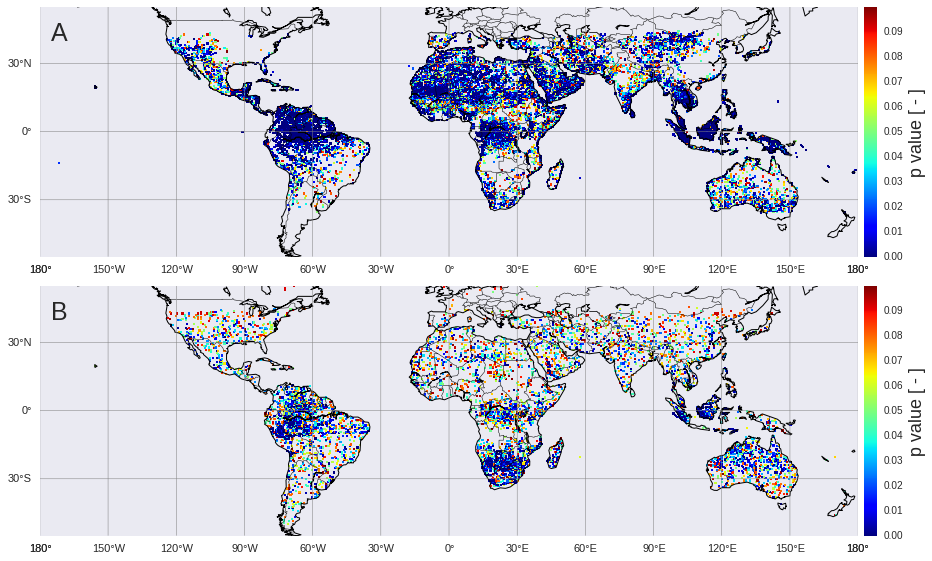

In [41]:
lllat    = -55
urlat    = 55
lllon    = -180
uprlon   = 180

map    = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
fig    = plt.figure(1,figsize=(15,15))

ax     = fig.add_subplot(211)
xx, yy = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
imm    = map.pcolormesh(xx,yy,sifter,cmap='jet') # GnBU,Jet,coolwarm
cb  = add_colorbar(imm)
#imm.set_clim(vmin=0, vmax=0.06)
#ax.set_title('Significance of T test per pixel between GOME2a and GOME2b',fontsize=18)
cb.set_label('p value [ - ]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
ax.annotate('A',(-175,40),fontsize=25)

ax     = fig.add_subplot(212)
xx, yy = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
imm    = map.pcolormesh(xx,yy,bbbb,cmap='jet') # GnBU,Jet,coolwarm
cb  = add_colorbar(imm)
#imm.set_clim(vmin=0, vmax=0.06)
#ax.set_title('Significance of T test per pixel between GOME2a and GOME2b',fontsize=18)
cb.set_label('p value [ - ]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
ax.annotate('B',(-175,40),fontsize=25)

fig.subplots_adjust(hspace=-0.5)

fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/PvalueMap_both.png',bbox_inches='tight',DPI=1000)
plt.show()

In [6]:
sifter_ga = np.load('sifter_ga.npy')
sifter_gb = np.load('sifter_gb.npy')

gome2a_avg_sifter = np.mean(np.ma.masked_invalid(sifter_ga),axis=0)
gome2b_avg_sifter = np.mean(np.ma.masked_invalid(sifter_gb),axis=0)

gome2a_sifter     = np.ma.masked_where(seamask==0,gome2a_avg_sifter)
gome2b_sifter     = np.ma.masked_where(seamask==0,gome2b_avg_sifter)

#NAsa
ga = np.ma.masked_where(seamask==0,gome2a_avg[::-1,:])
gb = np.ma.masked_where(seamask==0,gome2b_avg[::-1,:])#*seamask

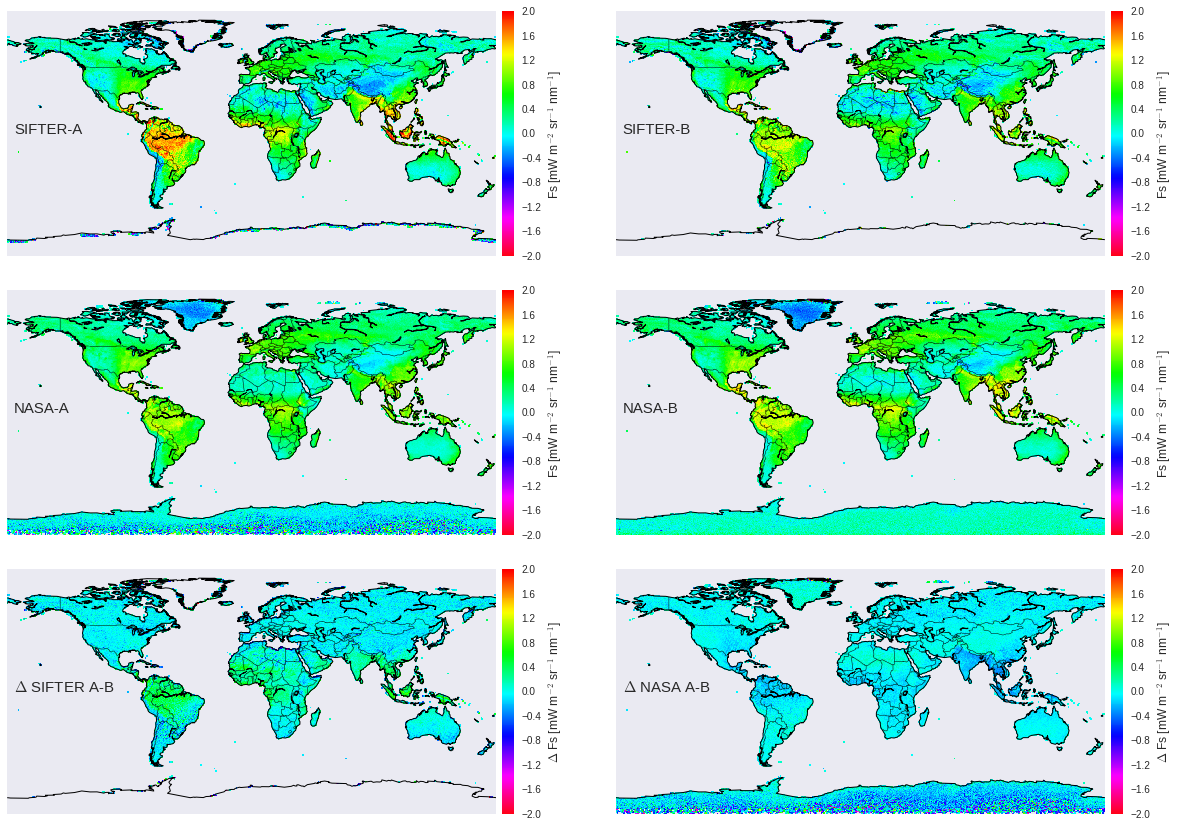

In [7]:
xx, yy  = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
map     = Basemap(projection='cyl', lat_0=0, lon_0=0)

fig     = plt.figure(1,figsize=(20,20))

ax      = fig.add_subplot(321)
imm     = map.pcolormesh(xx,yy,gome2a_sifter,cmap='hsv_r') # GnBU,Jet,coolwarm
cb      = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
cb.set_label('Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()
ax.annotate('SIFTER-A',(-175,0),fontsize=15)

ax           = fig.add_subplot(322)
imm          = map.pcolormesh(xx,yy,gome2b_sifter,cmap='hsv_r') # GnBU,Jet,coolwarm
cb           = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
cb.set_label('Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()
ax.annotate('SIFTER-B',(-175,0),fontsize=15)


ax      = fig.add_subplot(323)
imm     = map.pcolormesh(xx,yy,ga,cmap='hsv_r') # GnBU,Jet,coolwarm
cb      = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
cb.set_label('Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()
ax.annotate('NASA-A',(-175,0),fontsize=15)

ax           = fig.add_subplot(324)
imm          = map.pcolormesh(xx,yy,gb,cmap='hsv_r') # GnBU,Jet,coolwarm
cb           = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
cb.set_label('Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()
ax.annotate('NASA-B',(-175,0),fontsize=15)

ax           = fig.add_subplot(325)
imm          = map.pcolormesh(xx,yy,gome2a_sifter-gome2b_sifter,cmap='hsv_r') # GnBU,Jet,coolwarm
cb           = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
cb.set_label('$\Delta$ Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()
ax.annotate('$\Delta$ SIFTER A-B',(-175,0),fontsize=15)

ax           = fig.add_subplot(326)
imm          = map.pcolormesh(xx,yy,ga-gb,cmap='hsv_r') # GnBU,Jet,coolwarm
cb           = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
cb.set_label('$\Delta$ Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=12)
map.drawcoastlines()
map.drawcountries()
ax.annotate('$\Delta$ NASA A-B',(-175,0),fontsize=15)


fig.subplots_adjust(hspace=-0.5)
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/GOME2_a_b_2_both.png',bbox_inches='tight',DPI=1000)
plt.show()

#print np.median(gome2a_avg), np.median(gome2b_avg)

0.279543543921


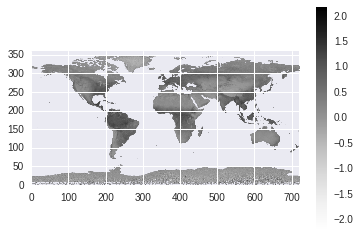

In [30]:
imshow(ga)
colorbar()
plt.gca().invert_yaxis()
print ga.mean()


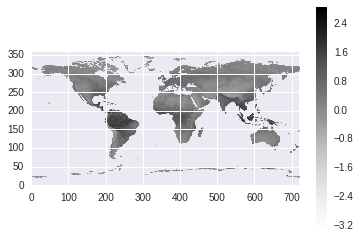

In [31]:
imshow(gome2a_sifter)
colorbar()
plt.gca().invert_yaxis()

0.414641996621


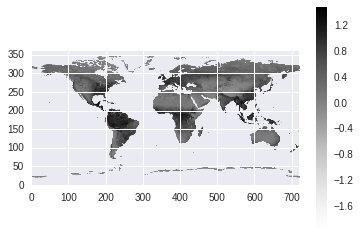

In [35]:
new_ga = np.ma.masked_array(ga,gome2a_sifter.mask)
imshow(new_ga)
plt.gca().invert_yaxis()
colorbar()
print new_ga.mean()

0.465657144445


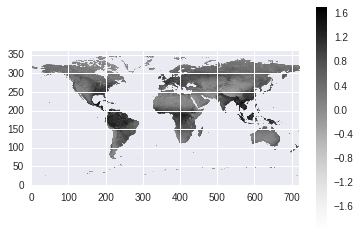

In [36]:
new_gb = np.ma.masked_array(gb,gome2b_sifter.mask)
imshow(new_gb)
plt.gca().invert_yaxis()
colorbar()
print new_gb.mean()

In [34]:
print new_ga[150,400],ga[150,400],new_ga.mean(),ga.mean()

0.65918387423 0.65918387423 0.414511696632 0.279543543921


In [8]:
print 'SIFTER',gome2a_sifter.mean(),gome2b_sifter.mean(),gome2a_sifter.mean()-gome2b_sifter.mean(),gome2b_sifter.mean()/gome2a_sifter.mean()*100

SIFTER 0.364954850635 0.345162281755 0.0197925688794 94.5767075448


In [38]:
print np.mean(ga)-np.mean(gb)

-0.0624997404714


In [37]:
print 'NASA',new_ga.mean(),new_gb.mean(),new_ga.mean()-new_gb.mean(),new_gb.mean()/new_ga.mean()*100

NASA 0.414641996621 0.465657144445 -0.0510151478247 112.303420358
